In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import *
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
dt_watch = pd.read_csv('data/content_watch.csv')
dt_rates = pd.read_csv('data/content_rates.csv')

In [10]:
dt_watch.head()

,user_index,item_id,watch_duration
0,1677306600,2011099417,34.0
1,1677306600,-1495220568,11175.0
2,1677306600,1642882038,651.0
3,1677306600,742930742,1192.0
4,1677306600,-1068637190,8465.0


In [11]:
dt_rates.head()

,user_index,item_id,rate
0,389298900,1515894657,10
1,389298900,-742253908,10
2,-631917800,-1660713173,10
3,124302000,1746724601,8
4,933344900,-1723773973,8


In [12]:
dt_watch.describe()

,user_index,item_id,watch_duration
count,7.438850e+05,7.438850e+05,7.438820e+05
mean,1.616336e+06,6.044438e+07,9.044793e+03
std,1.238842e+09,1.237372e+09,2.740012e+04
min,-2.147472e+09,-2.147080e+09,0.000000e+00
25%,-1.073281e+09,-1.026217e+09,3.600000e+02
50%,9.969846e+06,6.634351e+07,2.648000e+03
75%,1.074825e+09,1.153929e+09,8.120750e+03
max,2.147450e+09,2.147454e+09,2.013658e+06


Заменим для удобства длительность на длительность в минутах:

In [15]:
dt_watch['watch_duration_min'] = dt_watch.watch_duration.apply(lambda x: x / 60)
dt_watch = dt_watch.drop(['watch_duration'], axis=1)

,user_index,item_id,content_count_byuser,watch_duration_min
count,7.438850e+05,7.438850e+05,743885.000000,743882.000000
mean,1.616336e+06,6.044438e+07,21.445746,150.746547
std,1.238842e+09,1.237372e+09,27.046123,456.668721
min,-2.147472e+09,-2.147080e+09,1.000000,0.000000
25%,-1.073281e+09,-1.026217e+09,7.000000,6.000000
50%,9.969846e+06,6.634351e+07,13.000000,44.133333
75%,1.074825e+09,1.153929e+09,26.000000,135.345833
max,2.147450e+09,2.147454e+09,367.000000,33560.966667


Добавим признаки:
- количество просмотренных пользователем айтемов за период
- суммарную длительность просмотров этим пользователем
- среднюю длительность просмотра для этого айтема
- отношение длительности просмотра к средней длительности просмотра этого айтема

In [16]:
dt_watch['content_count_byuser'] = dt_watch.groupby(dt_watch['user_index'])['item_id'].transform('nunique')
dt_watch['dur_sum_byuser'] = dt_watch.groupby(dt_watch['user_index'])['watch_duration_min'].transform('sum')
dt_watch['dur_mean_bycontent'] = dt_watch.groupby(dt_watch['item_id'])['watch_duration_min'].transform('mean')
dt_watch['relative_dur_byuser'] = dt_watch.apply (lambda row: row['watch_duration_min']/row['dur_mean_bycontent'],axis=1)
dt_watch.head(20)

,user_index,item_id,content_count_byuser,watch_duration_min,dur_sum_byuser,dur_mean_bycontent,relative_dur_byuser
0,1677306600,2011099417,12,0.566667,1220.266667,113.675622,0.004985
1,1677306600,-1495220568,12,186.250000,1220.266667,175.278938,1.062592
2,1677306600,1642882038,12,10.850000,1220.266667,174.898243,0.062036
3,1677306600,742930742,12,19.866667,1220.266667,188.547251,0.105367
4,1677306600,-1068637190,12,141.083333,1220.266667,140.675362,1.002900
5,1677306600,175922726,12,28.500000,1220.266667,216.193533,0.131826
6,1677306600,-1694002354,12,105.550000,1220.266667,111.637724,0.945469
7,1677306600,1385471959,12,33.500000,1220.266667,46.541195,0.719792
8,1677306600,994101469,12,0.666667,1220.266667,58.690489,0.011359
9,1677306600,1406420750,12,144.933333,1220.266667,106.039444,1.366787


In [17]:
dt_watch.describe()

,user_index,item_id,content_count_byuser,watch_duration_min,dur_sum_byuser,dur_mean_bycontent,relative_dur_byuser
count,7.438850e+05,7.438850e+05,743885.000000,743882.000000,743884.000000,743885.000000,743878.000000
mean,1.616336e+06,6.044438e+07,21.445746,150.746547,3089.863109,150.746534,1.000000
std,1.238842e+09,1.237372e+09,27.046123,456.668721,4614.391955,172.601870,1.632290
min,-2.147472e+09,-2.147080e+09,1.000000,0.000000,0.000000,0.000000,0.000000
25%,-1.073281e+09,-1.026217e+09,7.000000,6.000000,438.083333,72.345380,0.069878
50%,9.969846e+06,6.634351e+07,13.000000,44.133333,1413.566667,110.587897,0.477209
75%,1.074825e+09,1.153929e+09,26.000000,135.345833,3746.733333,150.177225,1.235554
max,2.147450e+09,2.147454e+09,367.000000,33560.966667,55604.333333,8091.150000,137.997616


In [18]:
dur_min = dt_watch.watch_duration_min.min()
dur_max = dt_watch.watch_duration_min.max()
dur_med = dt_watch.watch_duration_min.median()
dur_75q = dt_watch.watch_duration_min.quantile(0.75)

print('Median: %d' % dur_med)
print('75 quantile: %d' % dur_75q)

Median: 44
75 quantile: 135


Гистограмма длительности просмотов

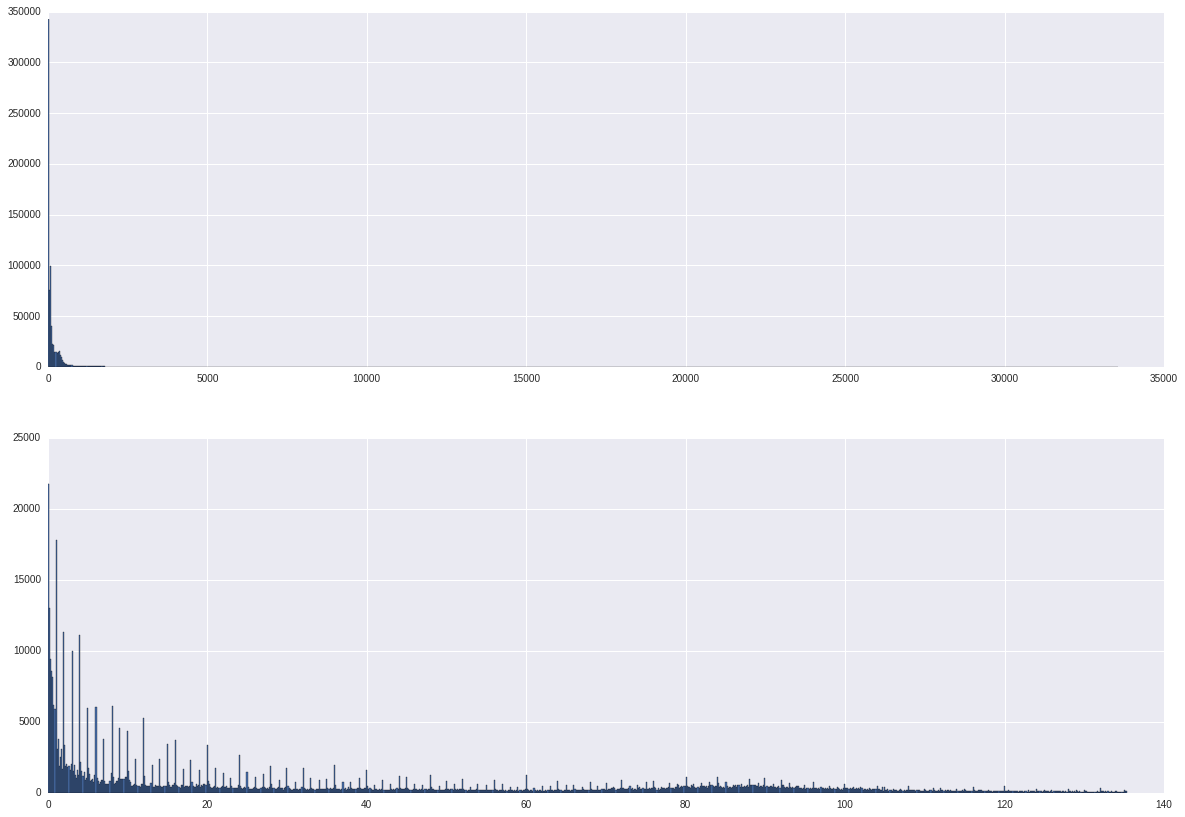

In [19]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20, 14))
axes[0].hist(dt_watch.watch_duration_min.dropna(), bins=1000, range=(dur_min, dur_max))
axes[1].hist(dt_watch.watch_duration_min.dropna(), bins=1000, range=(dur_min, dur_75q))
plt.show()

Количество элементов выборки / пользователей / контент айтемов

In [21]:
print 'Data counts:'
print dt_watch.count()
print '\nUnique users: %i' % len(dt_watch.user_index.value_counts())
print 'Unique contents: %i' % len(dt_watch.item_id.value_counts())

Data counts:
user_index              743885
item_id                 743885
content_count_byuser    743885
watch_duration_min      743882
dur_sum_byuser          743884
dur_mean_bycontent      743885
relative_dur_byuser     743878
dtype: int64

Unique users: 108124
Unique contents: 7146


Добавим в датасет оценки пользователей

In [22]:
train = pd.merge(dt_watch, dt_rates, how='left', on=['user_index', 'item_id'])
train.head()

,user_index,item_id,content_count_byuser,watch_duration_min,dur_sum_byuser,dur_mean_bycontent,relative_dur_byuser,rate
0,1677306600,2011099417,12,0.566667,1220.266667,113.675622,0.004985,NaN
1,1677306600,-1495220568,12,186.250000,1220.266667,175.278938,1.062592,NaN
2,1677306600,1642882038,12,10.850000,1220.266667,174.898243,0.062036,NaN
3,1677306600,742930742,12,19.866667,1220.266667,188.547251,0.105367,NaN
4,1677306600,-1068637190,12,141.083333,1220.266667,140.675362,1.002900,NaN


In [26]:
train_by_cont = train.groupby(['item_id'])['watch_duration_min', 'rate']\
                         .agg({'watch_duration_min': 'sum', 'rate': 'mean'})
train_by_cont.head(20)

,rate,watch_duration_min
item_id,,
-2147079912,9.25,93108.633333
-2146700661,NaN,636.000000
-2146555694,NaN,1857.650000
-2146266856,10.00,19067.133333
-2145666861,NaN,5437.800000
-2143425370,NaN,1956.900000
-2142375826,NaN,1079.633333
-2142339308,NaN,11620.500000
-2141976398,NaN,873.583333


Зависимость суммарной длительности просмотра от средней оценки контента:

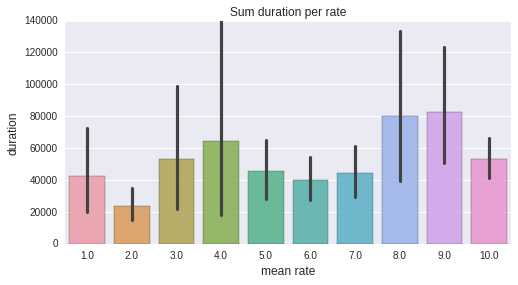

In [27]:
plt.figure(figsize=(8,4))
ax = sns.barplot(train_by_cont.rate.apply(np.round), train_by_cont.watch_duration_min, alpha=0.8)
plt.title("Sum duration per rate")
plt.ylabel('duration', fontsize=12)
plt.xlabel('mean rate', fontsize=12)
plt.show()

Гистограмма количества контент-айтемов по оценкам:

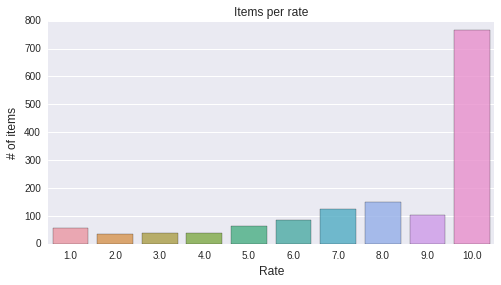

In [34]:
cont_byrate=train.groupby(['rate']).count().reset_index()

plt.figure(figsize=(8,4))
ax= sns.barplot(cont_byrate.rate, cont_byrate.item_id, alpha=0.8)
plt.title("Items per rate")
plt.ylabel('# of items', fontsize=12)
plt.xlabel('Rate', fontsize=12)
plt.show()

In [35]:
train_by_usercont = train.groupby(['user_index','item_id'])['watch_duration_min', 'rate']\
                         .agg({'watch_duration_min': 'sum', 'rate': 'mean'})
train_by_usercont.head(30)

rate  watch_duration_min
user_index  item_id                              
-2147471606 -1433963520   NaN            7.666667
-2147423305  1357960410   NaN            0.183333
-2147407952 -549996512    NaN         1296.983333
            -14855385     NaN           41.333333
             6761694      NaN            2.000000
             510527058    NaN            2.500000
             1733927365   NaN           35.950000
-2147333573 -1066700345   NaN            1.000000
-2147298847 -672834242    NaN          252.000000
            -177246609    NaN           54.000000
            -14855385     NaN          246.000000
             6761694      NaN          302.150000
             1941960894   NaN            9.000000
-2147292439 -1088586624   NaN          156.850000
-2147279394 -1838210187   NaN          216.083333
            -287953962    NaN            5.083333
             1069180695   NaN            0.916667
             1191368065   NaN          629.166667
             1293892980   NaN          112.916667
-2147257965  1424852366   NaN            2.000000
-2147203519 -110292034    NaN            1.333333
-2147174910 -1680357954   NaN           35.000000
            -1661368351   NaN           90.583333
            -800399208    NaN          102.666667
            -365061166    NaN            2.083333
            -167461703    NaN           98.500000
            -121515734    NaN           65.000000
             87331405     NaN           40.000000
             178353543    NaN           87.833333
             527751333    NaN            5.000000

In [36]:
train_by_usercont.count()

rate                    1439
watch_duration_min    735158
dtype: int64

Попарные сравнения признаков:

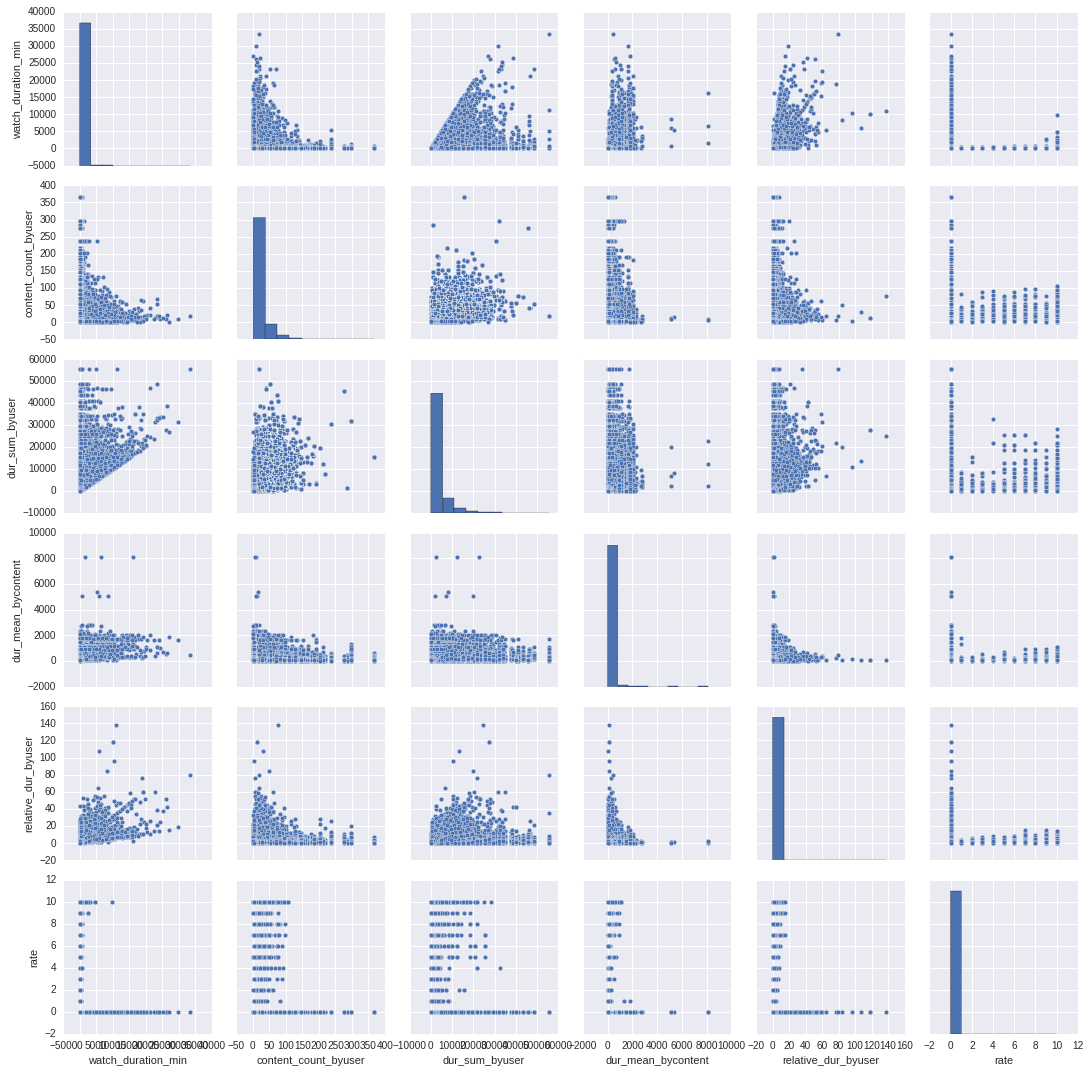

In [37]:
sns.pairplot(train.fillna(0), vars=['watch_duration_min', 'content_count_byuser', 'dur_sum_byuser', 'dur_mean_bycontent','relative_dur_byuser','rate'])